# Obrazova analytika - Tým. č 15


In [1]:
from google.cloud import vision
from google.oauth2 import service_account

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

In [3]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

In [5]:
soubor = './data/tym15/101601.jpg'

In [6]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

In [7]:
image = vision.Image(content = content)

In [8]:
response = client.label_detection(image = image)

In [9]:
labels = response.label_annotations

In [10]:
type(labels)

proto.marshal.collections.repeated.RepeatedComposite

In [11]:
print(labels)

[mid: "/m/02yfx"
description: "Fluid"
score: 0.98239434
topicality: 0.98239434
, mid: "/m/04k94"
description: "Liquid"
score: 0.95440495
topicality: 0.95440495
, mid: "/m/05kq4"
description: "Ocean"
score: 0.93966347
topicality: 0.93966347
, mid: "/m/02p0sll"
description: "Wave"
score: 0.91486496
topicality: 0.91486496
, mid: "/m/06npx"
description: "Sea"
score: 0.89547354
topicality: 0.89547354
, mid: "/m/034srq"
description: "Wind wave"
score: 0.8940093
topicality: 0.8940093
, mid: "/m/02fhdf"
description: "Water sport"
score: 0.79053974
topicality: 0.79053974
, mid: "/m/07kc0"
description: "Tide"
score: 0.7619462
topicality: 0.7619462
, mid: "/m/03m9d0z"
description: "Wind"
score: 0.7396468
topicality: 0.7396468
, mid: "/m/0b3yr"
description: "Beach"
score: 0.71051323
topicality: 0.71051323
]


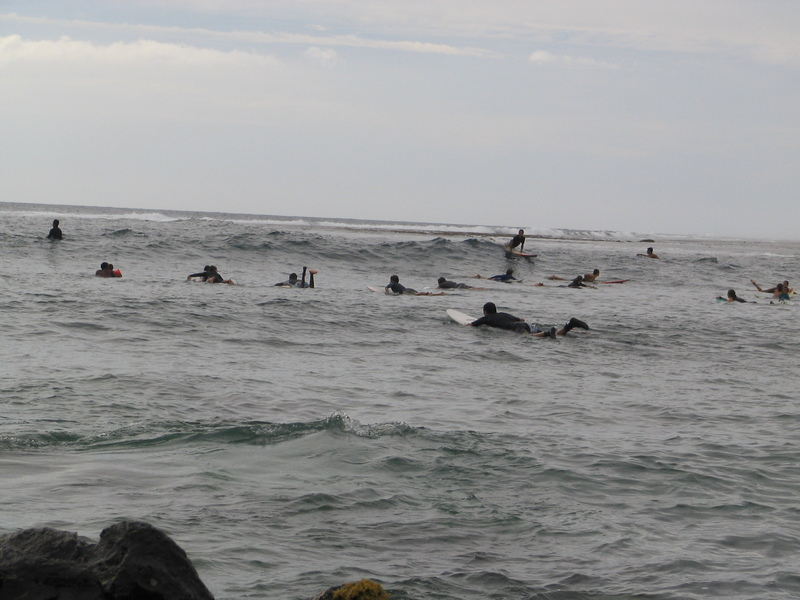

In [12]:
Image(soubor)

In [13]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Fluid
Liquid
Ocean
Wave
Sea
Wind wave
Water sport
Tide
Wind
Beach


In [14]:
import os

In [15]:
path = './data/tym15'

In [16]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [17]:
labels_images = {}

In [18]:
directories = os.listdir(path)

In [19]:
print(directories)

['101601.jpg', '101702.jpg', '101900.jpg', '118801.jpg', '122001.jpg', '123204.jpg', '130700.jpg', '142701.jpg', '146404.jpg', '146800.jpg', '148202.jpg', '148600.jpg', '148801.jpg', '149000.jpg', '149603.jpg']


In [20]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [21]:
print(labels_images)

{'./data/tym15\\101601.jpg': ['Fluid', 'Liquid', 'Ocean', 'Wave', 'Sea', 'Wind wave', 'Water sport', 'Tide', 'Wind', 'Beach'], './data/tym15\\101702.jpg': ['Body of water', 'Underwater', 'Organism', 'Natural environment', 'Fluid', 'Coral reef', 'Vertebrate', 'Coral', 'Algae', 'Fish'], './data/tym15\\101900.jpg': ['Organism', 'Natural environment', 'Underwater', 'Coral reef', 'Fluid', 'Coral', 'Stony coral', 'Sea', 'Reef', 'Aquatic plant'], './data/tym15\\118801.jpg': ['Brown', 'Outcrop', 'Rock', 'Landscape', 'Bedrock', 'Terrain', 'Formation', 'Geology', 'Badlands', 'Fault'], './data/tym15\\122001.jpg': ['Body of water', 'Window', 'Waterway', 'Neighbourhood', 'Town', 'Water resources', 'Residential area', 'Water', 'Bank', 'Channel'], './data/tym15\\123204.jpg': ['Lighting', 'Ceiling', 'Interior design', 'Interior design', 'Decoration', 'Temple', 'Place of worship', 'Candle', 'Ornament', 'Collection'], './data/tym15\\130700.jpg': ['Body of water', 'Fluid', 'Water resources', 'Natural lan

In [22]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [23]:
print(tags)

{'Fluid': [4, ['./data/tym15\\101601.jpg', './data/tym15\\101702.jpg', './data/tym15\\101900.jpg', './data/tym15\\130700.jpg']], 'Liquid': [1, ['./data/tym15\\101601.jpg']], 'Ocean': [1, ['./data/tym15\\101601.jpg']], 'Wave': [1, ['./data/tym15\\101601.jpg']], 'Sea': [2, ['./data/tym15\\101601.jpg', './data/tym15\\101900.jpg']], 'Wind wave': [1, ['./data/tym15\\101601.jpg']], 'Water sport': [1, ['./data/tym15\\101601.jpg']], 'Tide': [1, ['./data/tym15\\101601.jpg']], 'Wind': [1, ['./data/tym15\\101601.jpg']], 'Beach': [2, ['./data/tym15\\101601.jpg', './data/tym15\\142701.jpg']], 'Body of water': [3, ['./data/tym15\\101702.jpg', './data/tym15\\122001.jpg', './data/tym15\\130700.jpg']], 'Underwater': [2, ['./data/tym15\\101702.jpg', './data/tym15\\101900.jpg']], 'Organism': [2, ['./data/tym15\\101702.jpg', './data/tym15\\101900.jpg']], 'Natural environment': [2, ['./data/tym15\\101702.jpg', './data/tym15\\101900.jpg']], 'Coral reef': [2, ['./data/tym15\\101702.jpg', './data/tym15\\10190

In [24]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [25]:
print(sort_tabs[0])

('Fluid', [4, ['./data/tym15\\101601.jpg', './data/tym15\\101702.jpg', './data/tym15\\101900.jpg', './data/tym15\\130700.jpg']])


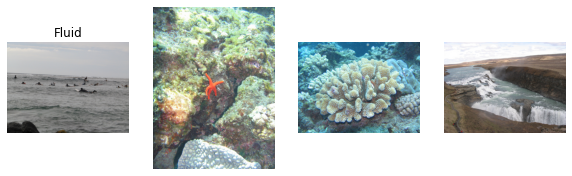

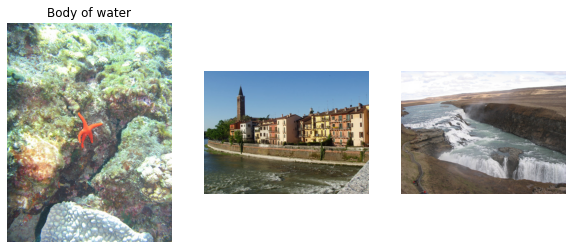

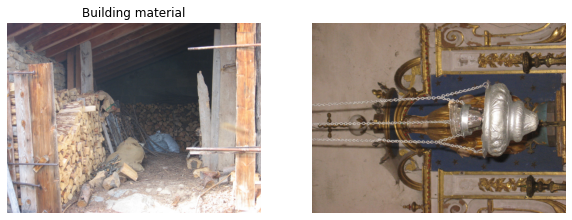

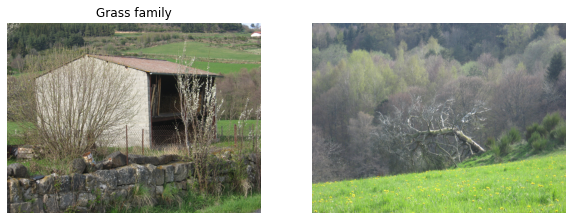

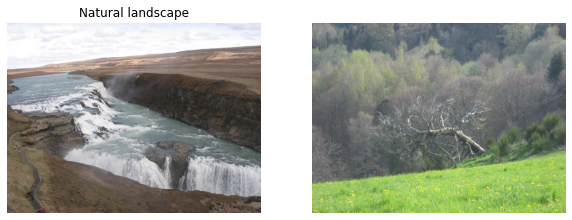

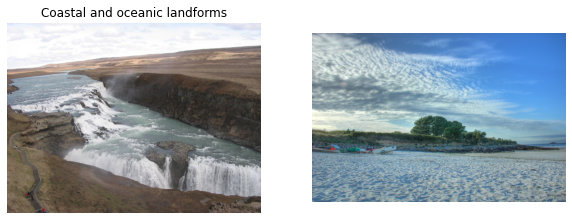

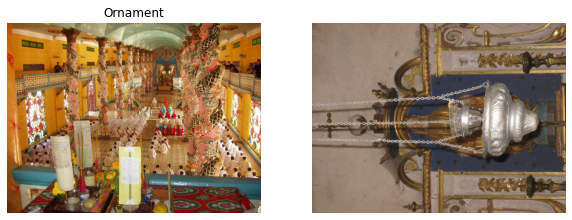

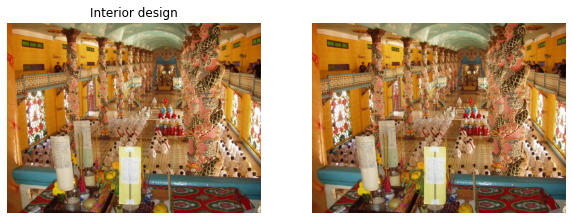

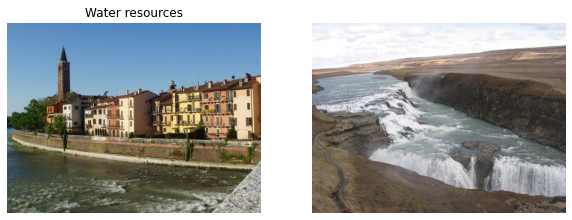

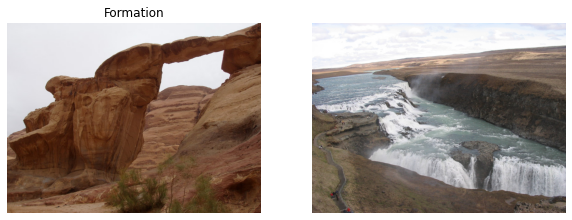

In [31]:
for k in range(10):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()

# Otázky a odpovědi
1) Jaké otázky jste si kladli?
Jak z obrázku poznat, zda se jedná o vhodnou destinaci?
Jak využít obrázky z dovolených k dalším marketingovým aktivitám?
Jak poznáme, že si uživatel dovolenou užil?
Jaké tagy se objevovaly nejčastěji?
Jaké obrázky se mezi recenzemi opakují?

2) Na jaké otázky dokáže odpovědět dataset?
V jakém druhu destinace se cestovatel nacházel.
Jaké obsahuje obrázky a jaké jsou jejich tagy.

3) Jaká další data navrhujete získat pro kvalitnější řešení?
Text recenze uživatele.

4) Jaké otázky jste vybrali pro zpracování (s ohledem na čas a schopnosti)?
Jaké tagy se objevovaly nejčastěji?
Jak využít obrázky z dovolených k dalším marketingovým aktivitám?

5) Jaké jste provedli kroky pro jejich zodpovězení?
Google API a ImageAnnotatorClient

6) K jakým jste došli výsledkům?
Jaké tagy se objevovaly nejčastěji?
Fluid
Body of water
Costal and oceanic landform
Ornament
Natural landscape

7) Co doporučujete?
Next Best Action a personalizované doporučení pro nejlepší možné navštívení míst dle historických recenzí 
Redundance některých slov - možnost využít synonyma a spojit některé tagy



